In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

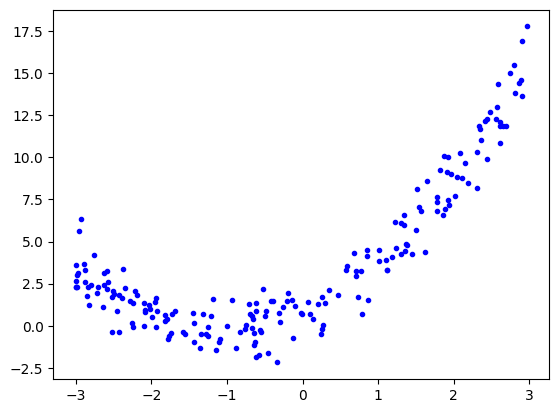

In [3]:
x = 6 *  np.random.rand(200 ,1 ) - 3
y = 0.8 + x**2 + 2*x + np.random.randn(200 , 1)
plt.plot(x , y , "b.")

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

R^2:  0.6020214187823234


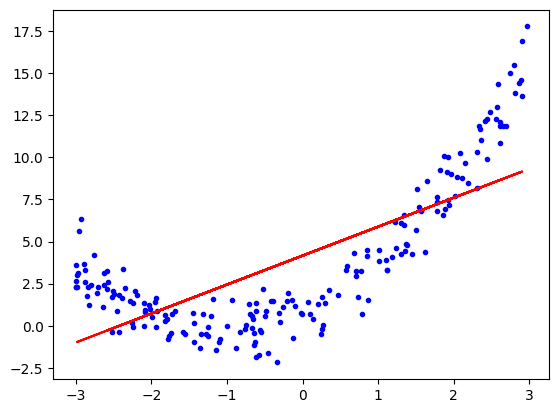

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)
print("R^2: ", lr.score(x_test , y_test))
plt.plot(x,y,"b.")
plt.plot(x_test, y_pred, color = "red")

In [6]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2 , include_bias = True)
x_train_transformed = pr.fit_transform(x_train)
x_test_transformed = pr.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed, y_train)
y_pred_new = lr.predict(x_test_transformed)
print("R2_score " , lr.score(x_test_transformed,y_test))


R2_score  0.9497519719741232


In [7]:
print(lr.coef_)
print(lr.intercept_)

[[0.         2.00018838 0.96086139]]
[0.88701279]


In [8]:
pd.DataFrame(x_test, columns = ['Test Values']).describe()

,Test Values
count,40.000000
mean,-0.280093
std,1.802273
min,-2.982655
25%,-1.929843
50%,-0.519119
75%,1.167530
max,2.906126


C:\Users\Sachin\AppData\Local\Temp\ipykernel_16452\4275751398.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_train , y_train , "b." , color = "blue" , label = "Training")
C:\Users\Sachin\AppData\Local\Temp\ipykernel_16452\4275751398.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_test , y_test ,"b." , color = "black" , label = "Test Data")


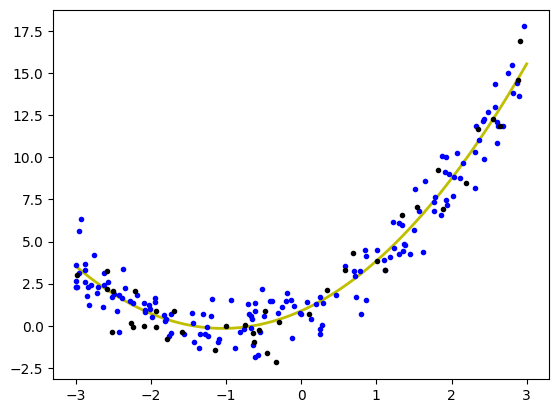

In [9]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = pr.transform(X_new)
y_new = lr.predict(X_new_poly)

plt.plot(X_new, y_new, "y-", linewidth=2, label="Predictions")

plt.plot(x_train , y_train , "b." , color = "blue" , label = "Training")
plt.plot(x_test , y_test ,"b." , color = "black" , label = "Test Data")

In [10]:
# Use the right degree in PolynomialFeature to avoid model underfitting and overfitting 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = pr.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

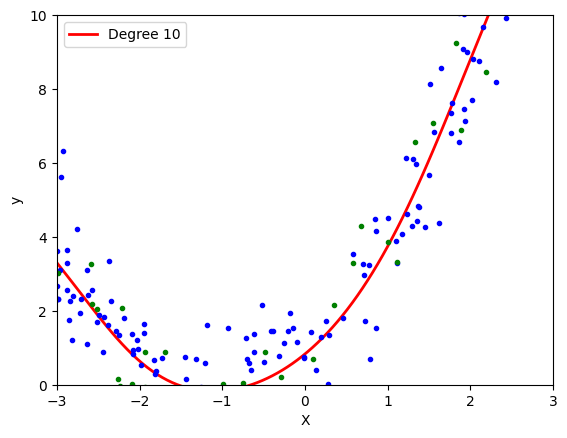

In [11]:
polynomial_regression(10)